# **EPIC 3 - DATA PREPARATION**

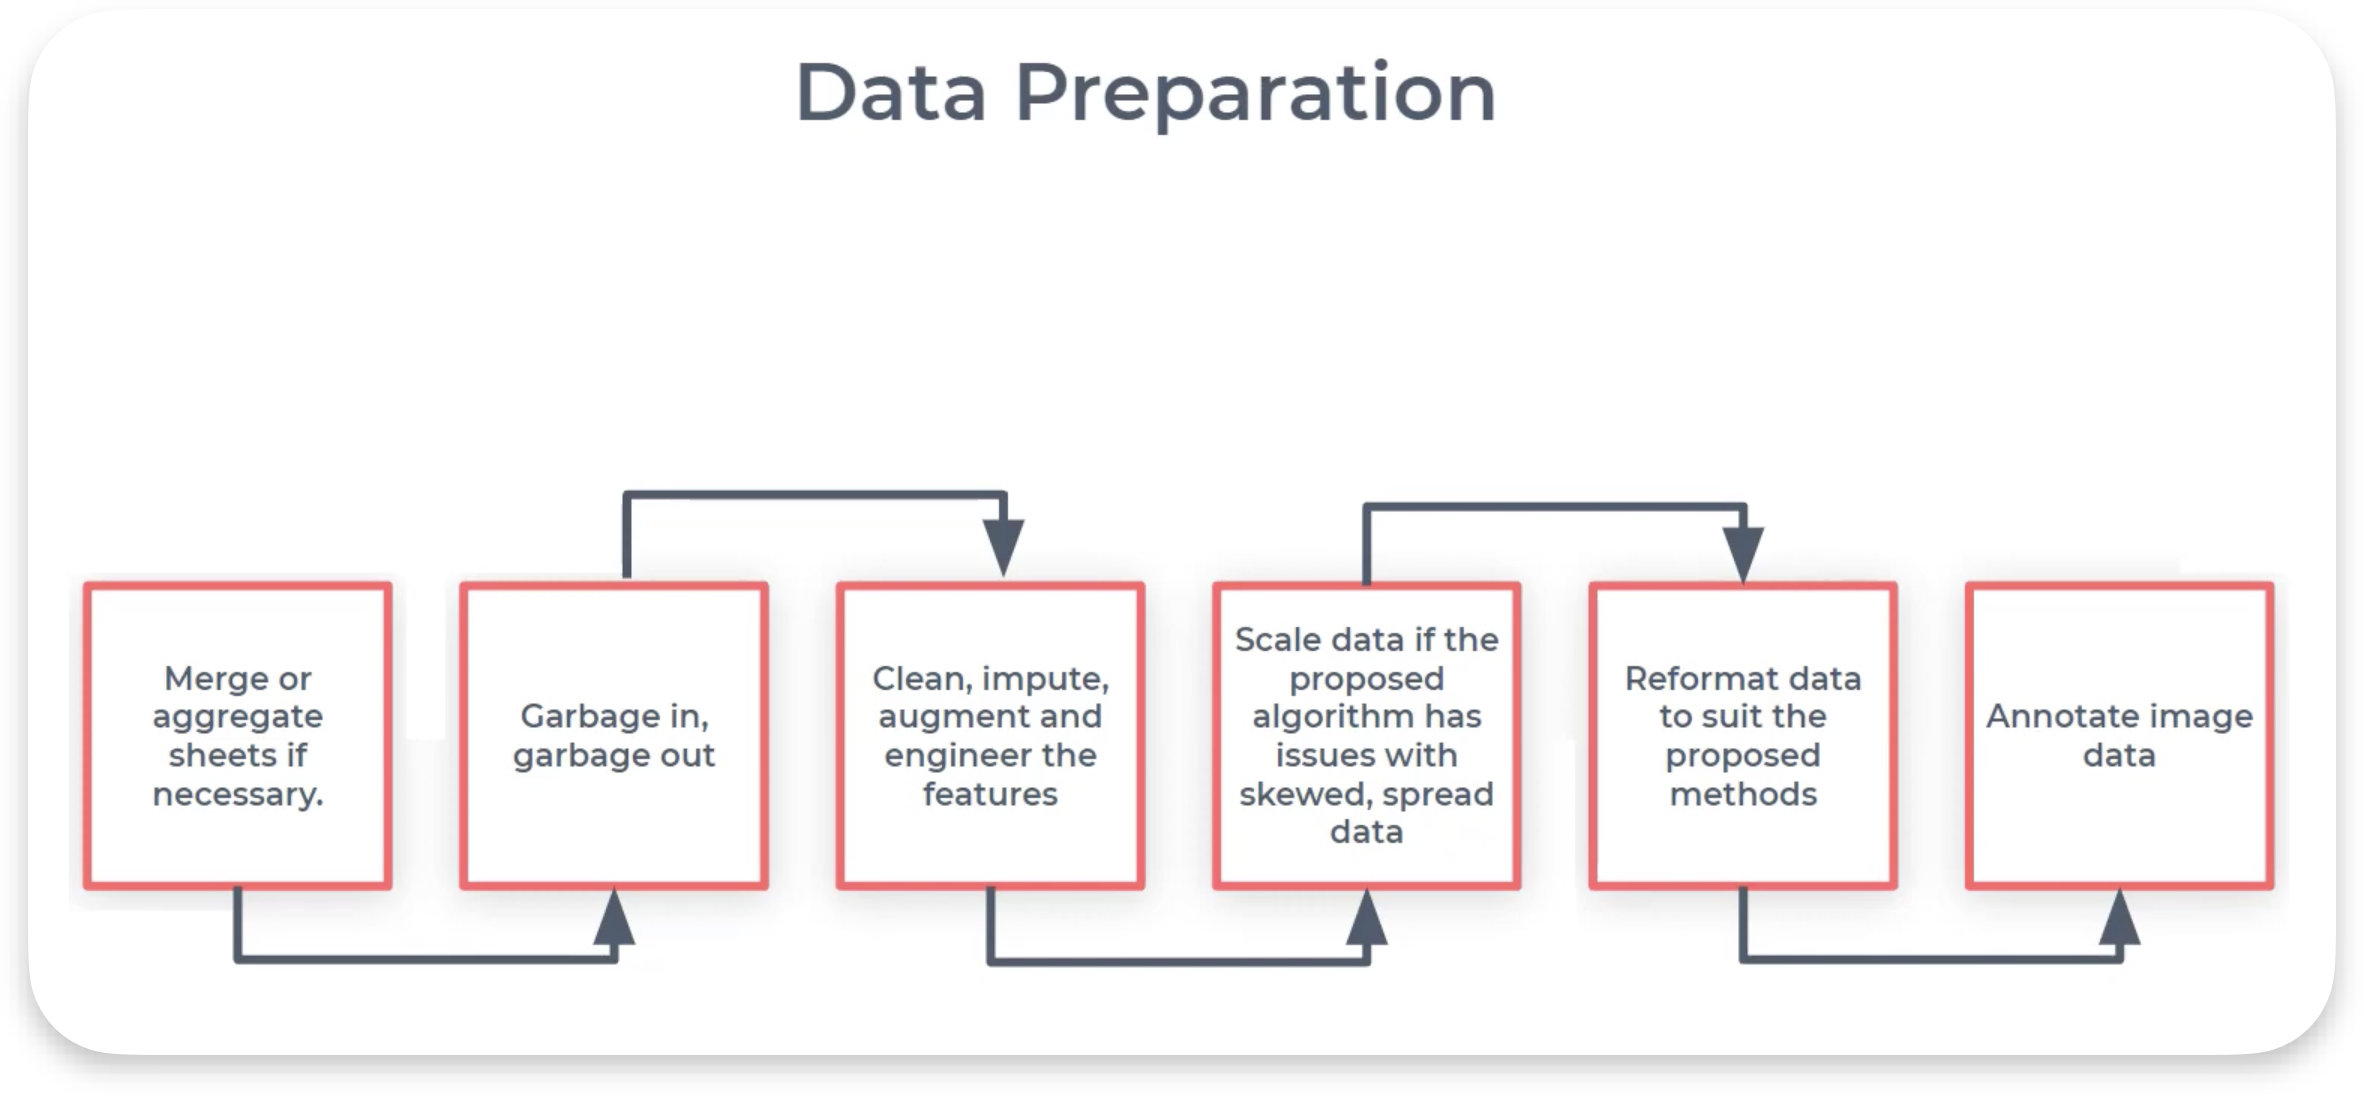

## Objectives

- Pre-process the data for the machine learning model.

### Acceptance Criteria
- All images should be labelled, resized and normalized to a standard size (LO 3.1).
- Datasets for each animal should have equal number of images to avoid bias.

## Tasks
- Resize and normalize the images to a standard size.
- Augment and engineer features.

## Inputs

- inputs/[datasets]: folders containing the raw image datasets for each animal.

## Outputs

- An image dataset containing labelled animal images of a standard size and equal number of images for each animal.

---

# Change working directory

In [4]:
import os
current_dir = os.getcwd()
print("Current working directory is:", current_dir)

Current working directory is: /Users/gingermale/Documents/repos/PP5/pet-image-classifier


In [2]:
os.chdir(os.path.dirname(current_dir)) # Change the current working directory to the parent directory
current_dir = os.getcwd() # Get the new current working directory
print("Changing the working directory to parent folder:", current_dir)

Changing the working directory to parent folder: /Users/gingermale/Documents/repos/PP5/pet-image-classifier


# Resize images

In [18]:
from PIL import Image, UnidentifiedImageError

def resize_images(directory, size=(150, 150)):
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg', '.JPG')):
                file_path = os.path.join(dirpath, filename)
                try:
                    with Image.open(file_path) as img:
                        img = img.convert('RGB')  # Convert image to RGB mode
                        new_img = img.resize(size)
                        new_img.save(file_path)
                except UnidentifiedImageError:
                    print(f"Skipping file (not an image or corrupted): {file_path}")

resize_images('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')

/Users/gingermale/Documents/repos/PP5/pet-image-classifier/venv/lib/python3.8/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Any images that could not be resized were deleted.

Images were checked to ensure they were all the same size.

In [10]:
def check_image_sizes(directory, size=(150, 150)):
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(dirpath, filename)
                with Image.open(file_path) as img:
                    if img.size != size:
                        print(f"Image {file_path} is not {size}, it's {img.size}")

check_image_sizes('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')

Rename files to include the animal name. This will help when the images are split into train, validate and test datasets.

In [19]:
def rename_files(directory):
    for dirpath, dirnames, filenames in os.walk(directory):
        for i, filename in sorted(enumerate(filenames)):  # Sort filenames before renaming
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.JPG')):  # Convert filename to lowercase before checking extension
                directory_name = os.path.basename(dirpath)
                directory_name = directory_name.replace(' ', '_').replace("'", "").lower()  # Replace spaces with underscores, remove apostrophes, and convert to lowercase
                new_filename = f"{directory_name}_{i}.jpg"
                old_file_path = os.path.join(dirpath, filename)
                new_file_path = os.path.join(dirpath, new_filename)
                os.rename(old_file_path, new_file_path)

rename_files('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')

# Conclusions and Next Steps

The datasets are now of consistent size, and have been labelled uniquely as a means to identify them when they are split into train, validate and test datasets. The next step, [#5](https://github.com/alanjameschapman/pet-image-classifier/issues/5) is to split the datasets into train, validate and test datasets.